## Homework 09

#### *08 November 2019*
#### *DATA 1010*

## Problem 1

In this problem, we'll explore the reason *gradient boosting* has the word *gradient* in its name. The story is compelling as well as practical, because it leads to a generalization of the boosting method which works for loss functions other than mean squared error. The main idea is that gradient boosting can be thought of as **applying gradient descent to the *model***. It will take several steps to unpack this clever idea. 

**Step 1**: Consider a very simple learning setup where $\mathcal{X} = \{1,2,\ldots,10\}$ and $\mathcal{Y} = \mathbb{R}$. We'll consider a totally flexible model which makes a different prediction for every element of $\mathcal{X}$, with no constraints on how those predictions relate to each other. In other words, any element $\mathbf{\hat{y}} = (\hat{y}_1, \hat{y}_2, \ldots, \hat{y}_{10})$ of $\mathbb{R}^{10}$ will be considered a valid model. As a loss functional, we'll use mean squared error. 

Suppose that we happen to get 10 training observations, one for each value of $\mathcal{X}$. What is empirical loss minimizer? 

In [1]:
using Test, Plots, LaTeXStrings

In [2]:
pyplot(fontfamily = "Palatino", size = (400, 250), fmt = :svg);

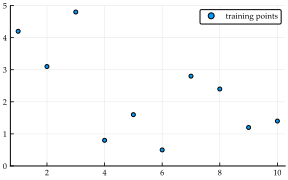

In [3]:
x = 1:10
y = [4.2, 3.1, 4.8, 0.8, 1.6, 0.5, 2.8, 2.4, 1.2, 1.4]
scatter(x,y, ylims = (0,5), label = "training points")

*Solution*. 

**Step 2**: Now, let's pretend we didn't notice how to cut straight to the empirical risk minimizer, as we did in Step 1. Let's suppose we start with some random initial guess for $\mathbf{\hat{y}}$ (shown below) and want to move closer to the correct solution using gradient descent. Note that this *is* grad descent with no bells and whistles, since the function we're minimizing is a function of the 10 variables $\hat{y}_1, \ldots, \hat{y}_{10}$. 

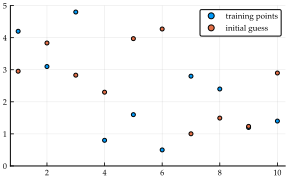

In [4]:
using Random; 
function training_plot()
    scatter(x, y, ylims = (0,5), label = "training points")
end
function random_start_plot!()
    Random.seed!(1234)
    ŷ = 5rand(10)
    scatter!(x, ŷ, ylims = (0,5), label = "initial guess")
end
training_plot()
random_start_plot!()

Make a plot which looks like the one below, which shows convergence of the gradient descent algorithm with learning rate 0.5. 

<img src="grad-descent-convergence.svg">

Note: if we had used a learning rate of 1.0, we would actually skip directly to the optimizing value in a single step. More on that later.

In [0]:
function grad_descent_plot()
    Random.seed!(1234)
    ŷ = 5rand(10)
    training_plot()
    random_start_plot!()
    ŷ_prev = ŷ_new = ŷ
    for i in 1:5
        # TODO: perform grad descent update with learning rate 0.5
        for j in 1:10
            # TODO: draw arrows
            #plot!([(,), (,)], arrow = arrow(), color = :rebeccapurple, lw = 2, label = "")
        end
    end
    current()
end
grad_descent_plot()

**Step 3**. There are several problems with using a unconstrained model (for example, it's prone to overfitting, and it isn't generalizable to settings where $\mathcal{X}$ is not discrete). We'd like to introduce some inductive bias by taking each step (which comprises *10* changes, one for each component of $\mathbf{\hat{y}}$) according to a more restrictive model. For example, we can use a depth-1 decision tree (also called a **decision stump**). While we're at it, let's also choose the starting point by fitting a model to the original data, rather than choosing the initial point randomly. 

Complete the definitions of the functions in the following cell and run the cell following that one to visualize the training process wherein each desired gradient step is approximated with a decision tree rather than being taken directly. 

In [6]:
"""
Return the vector obtained by replacing the first 
k values with their average and the remaining values
with their average
"""
function decision_stump_fit(y, k)
end

@test decision_tree_fit([2, 2, 5, 5, 5], 3) ≈ [3, 3, 3, 5, 5]

"""
Return the best decision stump fit, by mean squared error
"""
function decision_stump_fit(y)
    mse(ŷ) = sum((y - ŷ).^2)
    #k_min =  
    decision_tree_fit(y, k_min)
end

@test decision_tree_fit([1, 2, 1, 5, 5]) ≈ [4/3, 4/3, 4/3, 5, 5]

Test Passed

In the plot below, we'll make double use of the horizontal axis, so that the arrows indicating iterations are easier to read. Bear in mind that each connected sequence of arrows pertain to the same $x$ value. 

Infer *from the graph* where each of the six decision trees made its split. 

In [0]:
function grad_descent_decision_tree_plot(num_iterations)
    training_plot()
    colors = Plots.Colors.distinguishable_colors(num_iterations, colorant"rebeccapurple", 
                                                 lchoices = 15:50, cchoices = 15:50)
    ŷ_prev = ŷ_new = decision_tree_fit(y)
    scatter!(1:10, ŷ_new, label = "initial points")
    for i in 1:num_iterations
        ŷ_prev = ŷ_new
        ŷ_new += decision_tree_fit(y - ŷ_new)
        for j in 1:10
            plot!([(j + (i-1)/(3*num_iterations), ŷ_prev[j]), 
                   (j + i/(3*num_iterations), ŷ_new[j])], arrow = arrow(:closed, 0.2, 0.15), 
                    color = colors[i], lw = 1, msw = 0, label = "")
        end
    end
    scatter!((1:10) .+ 1/3, ŷ_new, label = L"$\mathbf{\hat{y}}$", size = (800,250))
    current()
end
grad_descent_decision_tree_plot(5)


*Solution*. 

---

**Step 4**. Steps 1 through 3 above establish the connection between gradient descent and gradient boosting (since Step 3 *is* a boosted decision tree!). There is one loose end to tie up: why does gradient descent involve a learning rate, while gradient boosting does not? 

The answer is actually that gradient boosting *does* involve a learning rate. It's just that there's an especially natural choice of learning rate (namely, 1) when we're dealing with the mean squared error loss. This is a special case of a gradient descent variant called *Newton's method* which requires an estimate of the second-order derivative of the objective function: 

(a) Suppose that $f$ is a differentiable function we're trying to minimize, and suppose that $\mathbf{x}_k$ is a guess for the minimum. Show that if we differentiate $f(\mathbf{x}_k) + \nabla f(\mathbf{x}_k)(\mathbf{x}-\mathbf{x}_k) + \frac{1}{2}(\mathbf{x}-\mathbf{x}_k)'H(\mathbf{x}_k)(\mathbf{x}-\mathbf{x}_k)$ with respect to $\mathbf{x}$ and set the result equal to zero (since we are looking for a critical point of $f$), then we find $\mathbf{x} = \mathbf{x}_k - [H(\mathbf{x}_k)]^{-1}\nabla f(\mathbf{x}_k)$. This suggests the update rule
$$
\mathbf{x}_{k+1} = \mathbf{x}_k - [H(\mathbf{x}_k)]^{-1}\nabla f(\mathbf{x}_k).
$$

(b) Show further the Hessian $H$ is the identity matrix if $f$ is one-half times a mean squared error loss function (that is, a function of the form $f(\mathbf{x}) = \frac{1}{2}(\mathbf{x} - \mathbf{u})'(\mathbf{x} - \mathbf{u})$, where $\mathbf{u}$ is a vector (corresponding to the training response values)). Show that the Newton update rule is the same in this case as using plain vanilla gradient descent with a learning rate of $1$. 

*Solution*. 

---

## Problem 2

Armed with a gradient boosting perspective that generalizes the fit-the-residuals idea we began with, we can apply the idea in more general settings. Apply gradient boosting with logistic loss to estimate the regression function for the binary classification problem shown below. Feel free to use the constant function 1/2 as the initial model. 

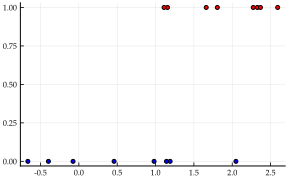

In [8]:
n = 8
Random.seed!(123)
blues = randn(n)
reds = 2 .+ randn(n)
xs = [blues; reds]
ys = repeat([0,1], inner = n)
function logistic_training_points()
    scatter([(p,0) for p in blues], color = :blue, legend = false)
    scatter!([(p,1) for p in reds], color = :red)
end
logistic_training_points()

Find the derivative of the logistic loss with respect to the vector `rs` of predictions at the training points. This is called the *pseudoresidual*, and it's the vector we'll be fitting each model with.

In [9]:
# fill out the ternary conditional in the array comprehension:
#pseudoresidual(rs, ys) = [ (condition ? result_if_true : result_if_false) for (r,y) in zip(rs, ys)]

In [10]:
rs = fill(1/2, 2n); # start with an estimate of 1/2 for every point

Now you can execute this cell repeatedly to fit the pseudoresiduals with a decision stump and perform an update of the estimate vector `rs`. 

In [0]:
# we're using a small learning rate:
rs .+= 0.05decision_stump_fit([y for (x,y) in 
            sort(collect(zip(xs, pseudoresidual(rs, ys))), by = first)])
logistic_training_points()
plot!(sort(xs), rs)

You should find that the model eventually misbehaves, because the probability estimates go past 0 and/or 1. What could we have done to avoid this problem of overshooting 0 and 1?

---

## Problem 3

Read the first three sections of the [Wikipedia article on Random Forests](https://en.wikipedia.org/wiki/Random_forest). Comment on the assertion *random forests are just bagged decision trees*. 

*Solution*. 

---

## Problem 4

It is not useful to apply bagging or boosting to linear regression models. Why not? 

*Solution*. 

---

## Problem 5

Suppose that weights and biases have been chosen for the neural network shown, and that a vector has been forward propagated through the network. Suppose that the vectors recorded at the purple nodes are $[1, -4, 2]$, $[6, 3]$, and $[9, 7, -4, -1, 5]$.

<center>
    <img src="neural-net.svg">
</center>

<p></p>

* What vector is recorded at the second green node (the one between $A_1$ and $A_2$)?

* Now suppose that we are in the midst of the backpropagation process, and we have just determined that the derivative of the cost with respect to the vector in the second purple node is equal to $[-3,-4]'$.  Calculate the derivative of the cost with respect to the matrix $W_2$. 


*Solution*. 